 # Caso 3: Estimacion de Tiempo de Entrega

Descripción: Se enfoca en estimar el tiempo de entrega de los pedidos utilizando los datasets olist_order_items_dataset.csv y olist_orders_dataset.csv.

# 1 Cargar y Preprocesar Datos

- Importacion de Librerias Necesarias

In [15]:
import pandas as pd

- Cargar y Preprocesar Datos

In [ ]:
# Cargar datasets
order_items = pd.read_csv('../datos/olist_order_items_dataset.csv')
orders = pd.read_csv('../datos/olist_orders_dataset.csv')

- Union de los dataset

In [3]:
# Unir los datasets según sea necesario
data = pd.merge(order_items, orders, on='order_id')

- Conversión de fechas a formato datetime.

In [4]:
# Convertir fechas a formato datetime
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])

- Creación de una columna para el tiempo de entrega en días.

In [5]:
# Crear una columna de tiempo de entrega en días
data['delivery_time_days'] = (data['order_delivered_customer_date'] - data['order_purchase_timestamp']).dt.days

- Conversión de product_id a una representación numérica.

In [6]:
#Convertir product_id a una representación numérica
data['product_id'] = data['product_id'].astype('category').cat.codes

In [7]:
# Crear nuevas características relevantes
data['purchase_year'] = data['order_purchase_timestamp'].dt.year
data['purchase_month'] = data['order_purchase_timestamp'].dt.month
data['delivery_weekday'] = data['order_delivered_customer_date'].dt.weekday

In [8]:
# Definir las características (X) y la etiqueta (y)
X = data[['purchase_year', 'purchase_month', 'delivery_weekday', 'product_id']]
y = data['delivery_time_days']

In [9]:
# Mostrar la estructura de los datos
print(data.head())


                           order_id  order_item_id  product_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1        8628   
1  00018f77f2f0320c557190d7a144bdd3              1       29597   
2  000229ec398224ef6ca0657da4fc703e              1       25667   
3  00024acbcdf0a6daa1e931b038114c75              1       15322   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1       22079   

                          seller_id  shipping_limit_date   price  \
0  48436dade18ac8b2bce089ec2a041202  2017-09-19 09:45:35   58.90   
1  dd7ddc04e1b6c2c614352b383efe2d36  2017-05-03 11:05:13  239.90   
2  5b51032eddd242adc84c38acab88f23d  2018-01-18 14:48:30  199.00   
3  9d7a1d34a5052409006425275ba1c2b4  2018-08-15 10:10:18   12.99   
4  df560393f3a51e74553ab94004ba5c87  2017-02-13 13:57:51  199.90   

   freight_value                       customer_id order_status  \
0          13.29  3ce436f183e68e07877b285a838db11a    delivered   
1          19.93  f6dd3ec061db4e3987629fe6b26e5cce    delive

# 2 Análisis Exploratorio de Datos (EDA)

- Visualización de la distribución del tiempo de entrega en días utilizando un histograma.

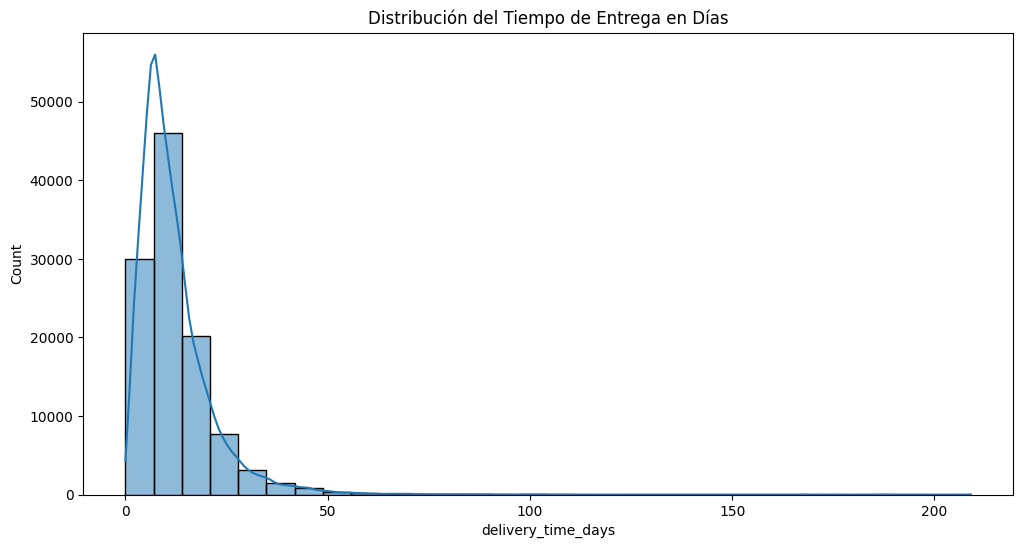

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis Exploratorio de Datos
plt.figure(figsize=(12, 6))
sns.histplot(data['delivery_time_days'], bins=30, kde=True)
plt.title('Distribución del Tiempo de Entrega en Días')
plt.show()

# 3 Ingenieria de caracteristicas

- Creación de nuevas características relevantes: año de compra, mes de compra y día de la semana de entrega.

In [11]:
# Crear nuevas características relevantes
data['purchase_year'] = data['order_purchase_timestamp'].dt.year
data['purchase_month'] = data['order_purchase_timestamp'].dt.month
data['delivery_weekday'] = data['order_delivered_customer_date'].dt.weekday

# 4 Entrenamiento de Modelos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Definir las características (X) y la etiqueta (y)
X = data[['purchase_year', 'purchase_month', 'delivery_weekday', 'product_id']]
y = data['delivery_time_days']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo de Gradient Boosting
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = model.predict(X_test)
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f} días')


# 5 Evaluacion y Visualizacion

- Visualización de la predicción vs realidad de los tiempos de entrega utilizando un gráfico de dispersión.

In [18]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicción vs Realidad de Tiempos de Entrega')
plt.xlabel('Tiempos de Entrega Reales (días)')
plt.ylabel('Tiempos de Entrega Predichos (días)')
plt.show()


NameError: name 'y_pred' is not defined

<Figure size 1200x600 with 0 Axes>